## Data El Niño–Southern Oscillation 2001 - 2023

In [2]:
# pustaka manipulasi data array
import numpy as np

# pustaka manipulasi data frame
import pandas as pd

# pustaka untuk visualisasi data
import matplotlib.pyplot as plt

- Load Hotspot Sumatera Selatan

In [3]:
df_hotspot = pd.read_csv("dataset/dataset_hotspot.csv", parse_dates=["acq_date"])
df_hotspot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  276 non-null    datetime64[ns]
 1   hotspot   276 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


- Load El Niño–Southern Oscillation

In [4]:
df_sst = pd.read_excel("dataset/dataset_enso.xlsx", sheet_name="SST Results", parse_dates=["acq_date"])
df_sst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  276 non-null    datetime64[ns]
 1   standard  276 non-null    float64       
 2   anomali   276 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.6 KB


In [5]:
df_oni = pd.read_excel("dataset/dataset_enso.xlsx", sheet_name="ONI Results", parse_dates=["acq_date"])
df_oni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  276 non-null    datetime64[ns]
 1   standard  276 non-null    float64       
 2   anomali   276 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.6 KB


In [6]:
df_soi = pd.read_excel("dataset/dataset_enso.xlsx", sheet_name="SOI Results", parse_dates=["acq_date"])
df_soi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  276 non-null    datetime64[ns]
 1   standard  276 non-null    float64       
 2   anomali   276 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.6 KB


- hasil akuisi data enso

In [7]:
# integrasi data hotspot dan enso
dataset = pd.concat([
    df_hotspot[["acq_date", "hotspot"]],
    df_sst[["standard", "anomali"]], 
    df_oni[["standard", "anomali"]],
    df_soi[["standard", "anomali"]]
], axis=1)

In [8]:
# rubah nama kolom
dataset.columns = ["acq_date", "hotspot", "sst_std", "sst_anom", "oni_std", "oni_anom", "soi_std", "soi_anom"]

In [9]:
dataset

,acq_date,hotspot,sst_std,sst_anom,oni_std,oni_anom,soi_std,soi_anom
0,2001-01-31,3,25.81,-0.76,25.88,-0.68,1.0,1.6
1,2001-02-28,5,26.18,-0.56,26.26,-0.52,1.7,2.8
2,2001-03-31,10,26.86,-0.37,26.76,-0.44,0.9,1.5
3,2001-04-30,20,27.24,-0.56,27.25,-0.34,0.2,0.3
4,2001-05-31,39,27.42,-0.46,27.49,-0.25,-0.5,-0.8
...,...,...,...,...,...,...,...,...
271,2023-08-31,186,28.20,1.30,28.28,1.32,-0.8,-1.4
272,2023-09-30,2247,28.29,1.53,28.32,1.56,-1.3,-2.1
273,2023-10-31,3200,28.36,1.59,28.49,1.78,-0.5,-0.8
274,2023-11-30,390,28.72,1.90,28.60,1.92,-0.8,-1.3


- Visualisasi Data Time Series

In [10]:
def plot_time_series(x, y, label):
    # membuat frame
    fig, ax = plt.subplots(figsize = (10,5))

    # membuat time series plot
    ax.plot(x, y, color="tab:blue", label=label, linewidth=2.5)

    # membuat label-label
    ax.set_title("", fontsize=14)
    ax.set_xlabel("", fontsize=12)
    ax.set_ylabel("", fontsize=12)
    ax.legend(loc="upper left")
    ax.grid(True)

    # menampilkan plot
    plt.show()

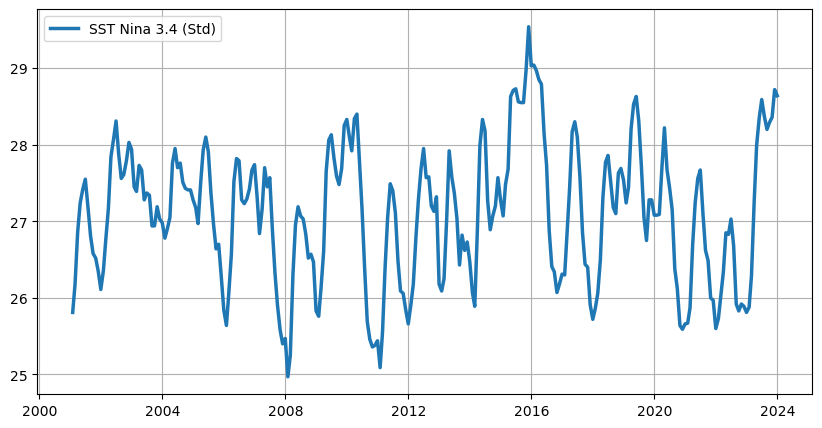

In [11]:
plot_time_series(dataset["acq_date"], dataset["sst_std"], "SST Nina 3.4 (Std)")

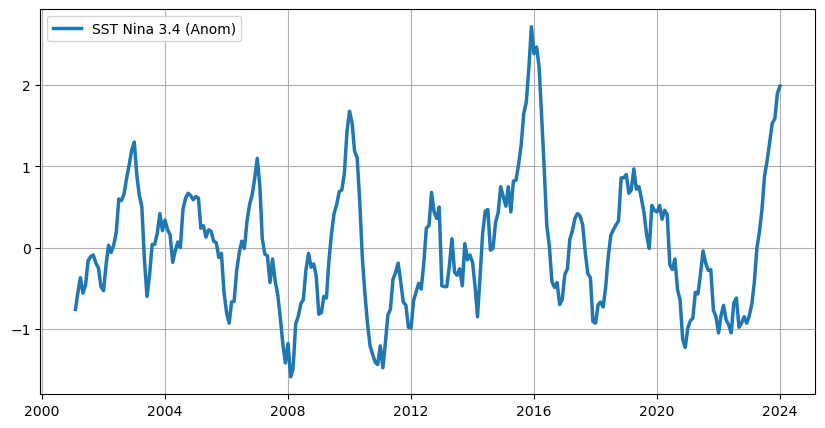

In [12]:
plot_time_series(dataset["acq_date"], dataset["sst_anom"], "SST Nina 3.4 (Anom)")

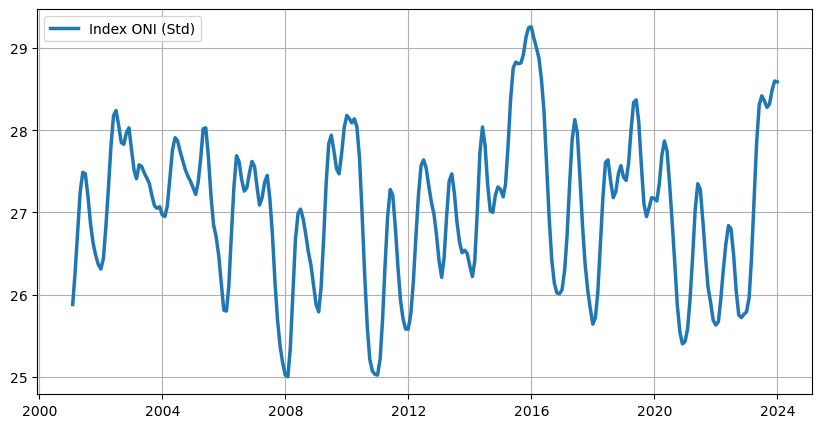

In [13]:
plot_time_series(dataset["acq_date"], dataset["oni_std"], "Index ONI (Std)")

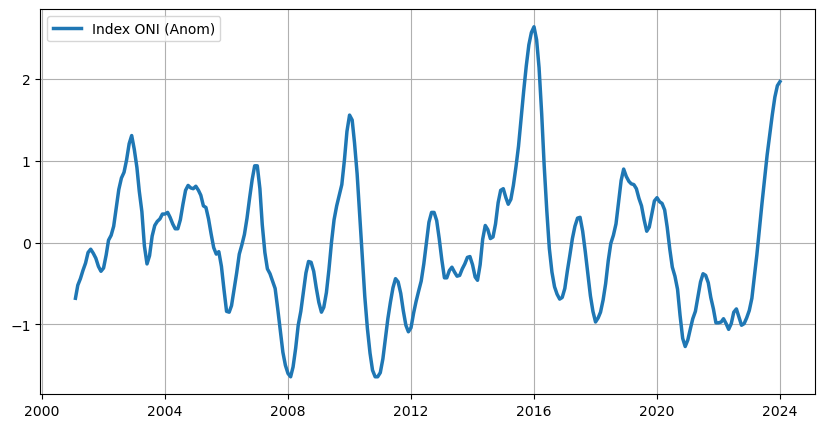

In [14]:
plot_time_series(dataset["acq_date"], dataset["oni_anom"], "Index ONI (Anom)")

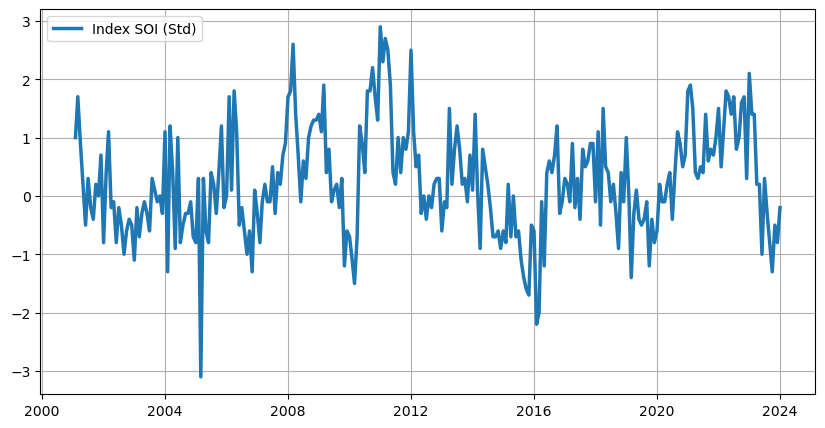

In [15]:
plot_time_series(dataset["acq_date"], dataset["soi_std"], "Index SOI (Std)")

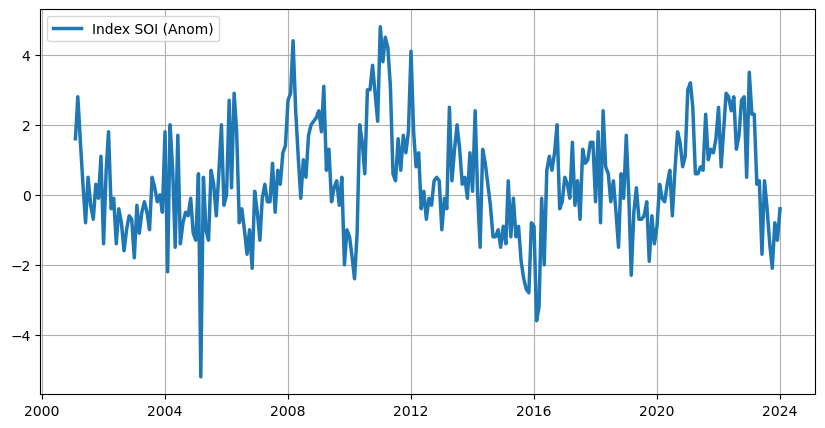

In [16]:
plot_time_series(dataset["acq_date"], dataset["soi_anom"], "Index SOI (Anom)")

- Normalisasi Data

In [19]:
# library normalize data with max-min algorithm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [22]:
# jika hotspot dipengaruhi oleh enso
data = dataset[["hotspot", "sst_anom", "oni_anom", "soi_anom"]]
data = data.values

In [27]:
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(np.array(data))

In [32]:
np.round(scaled,5)

array([[-1.     , -0.61485, -0.5514 ,  0.36   ],
       [-0.99972, -0.52204, -0.47664,  0.6    ],
       [-0.99903, -0.43387, -0.43925,  0.34   ],
       ...,
       [-0.55702,  0.47564,  0.59813, -0.12   ],
       [-0.94638,  0.61949,  0.66355, -0.22   ],
       [-0.9946 ,  0.66125,  0.68692, -0.04   ]])

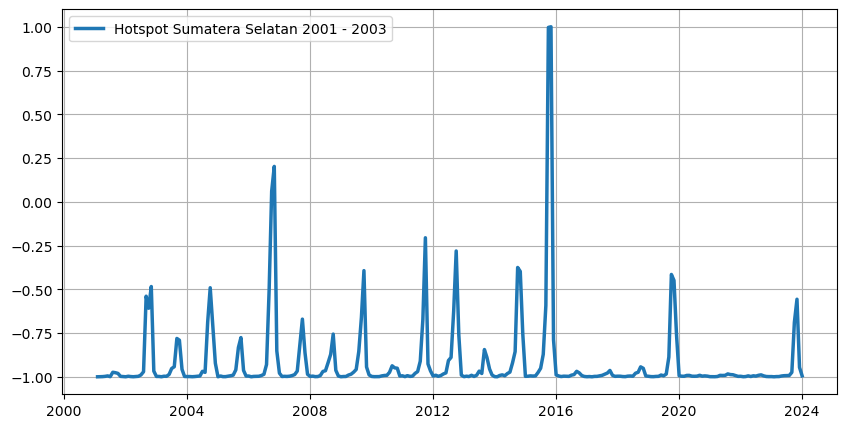

In [33]:
plot_time_series(dataset["acq_date"], np.array(scaled[:,:1]), "Hotspot Sumatera Selatan 2001 - 2003")

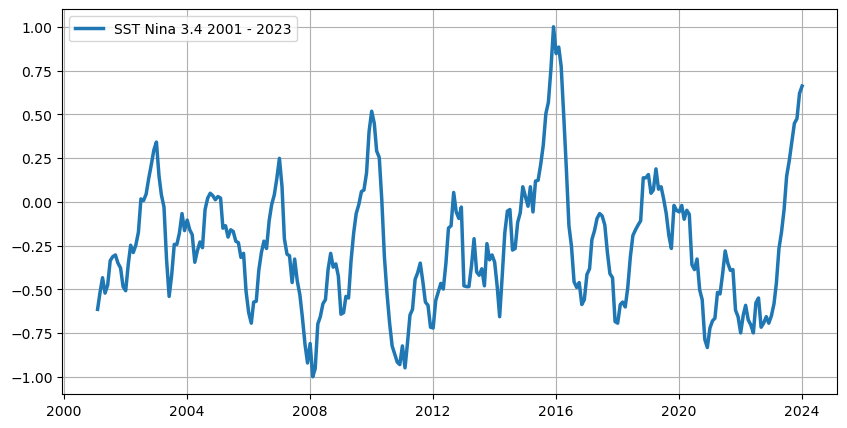

In [35]:
plot_time_series(dataset["acq_date"], np.array(scaled[:,1:2]), "SST Nina 3.4 2001 - 2023")

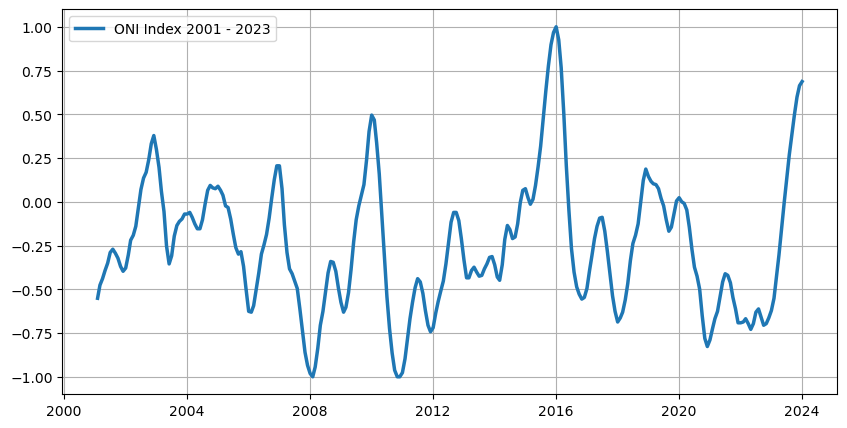

In [36]:
plot_time_series(dataset["acq_date"], np.array(scaled[:,2:3]), "ONI Index 2001 - 2023")

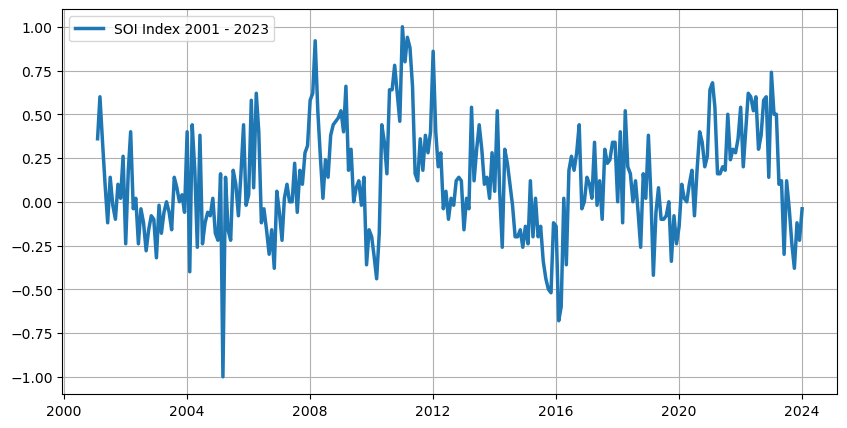

In [38]:
plot_time_series(dataset["acq_date"], np.array(scaled[:,3:4]), "SOI Index 2001 - 2023")